In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
q1=pd.read_csv('forestfires.csv')

In [4]:
q1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
q1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
q1.drop(['month','day'],axis=1,inplace=True)

In [8]:
q1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
mapping = {'small': 1, 'large': 2}

In [10]:
q1=q1.replace(mapping)

In [11]:
x = np.array(q1.iloc[:,0:28])
y = np.array(q1.iloc[:,28])

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
x_norm = norm_func(x)

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [15]:
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
hist=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)

Epoch 1/120
29/29 [==============================] - 0s 4ms/step - loss: -4.7646 - accuracy: 0.7336 - val_loss: -4.9217 - val_accuracy: 0.7258
Epoch 2/120
29/29 [==============================] - 0s 3ms/step - loss: -4.7988 - accuracy: 0.7336 - val_loss: -4.9570 - val_accuracy: 0.7258
Epoch 3/120
29/29 [==============================] - 0s 3ms/step - loss: -4.8331 - accuracy: 0.7336 - val_loss: -4.9928 - val_accuracy: 0.7258
Epoch 4/120
29/29 [==============================] - 0s 3ms/step - loss: -4.8678 - accuracy: 0.7336 - val_loss: -5.0279 - val_accuracy: 0.7258
Epoch 5/120
29/29 [==============================] - 0s 3ms/step - loss: -4.9017 - accuracy: 0.7336 - val_loss: -5.0647 - val_accuracy: 0.7258
Epoch 6/120
29/29 [==============================] - 0s 3ms/step - loss: -4.9367 - accuracy: 0.7336 - val_loss: -5.0997 - val_accuracy: 0.7258
Epoch 7/120
29/29 [==============================] - 0s 3ms/step - loss: -4.9712 - accuracy: 0.7336 - val_loss: -5.1347 - val_accuracy: 0.7258

Epoch 58/120
29/29 [==============================] - 0s 5ms/step - loss: -6.7261 - accuracy: 0.7336 - val_loss: -6.9412 - val_accuracy: 0.7258
Epoch 59/120
29/29 [==============================] - 0s 5ms/step - loss: -6.7609 - accuracy: 0.7336 - val_loss: -6.9761 - val_accuracy: 0.7258
Epoch 60/120
29/29 [==============================] - 0s 5ms/step - loss: -6.7953 - accuracy: 0.7336 - val_loss: -7.0111 - val_accuracy: 0.7258
Epoch 61/120
29/29 [==============================] - 0s 5ms/step - loss: -6.8294 - accuracy: 0.7336 - val_loss: -7.0469 - val_accuracy: 0.7258
Epoch 62/120
29/29 [==============================] - 0s 5ms/step - loss: -6.8646 - accuracy: 0.7336 - val_loss: -7.0808 - val_accuracy: 0.7258
Epoch 63/120
29/29 [==============================] - 0s 4ms/step - loss: -6.8983 - accuracy: 0.7336 - val_loss: -7.1177 - val_accuracy: 0.7258
Epoch 64/120
29/29 [==============================] - 0s 5ms/step - loss: -6.9334 - accuracy: 0.7336 - val_loss: -7.1530 - val_accuracy:

Epoch 115/120
29/29 [==============================] - 0s 5ms/step - loss: -8.6830 - accuracy: 0.7336 - val_loss: -8.9537 - val_accuracy: 0.7258
Epoch 116/120
29/29 [==============================] - 0s 4ms/step - loss: -8.7170 - accuracy: 0.7336 - val_loss: -8.9902 - val_accuracy: 0.7258
Epoch 117/120
29/29 [==============================] - 0s 5ms/step - loss: -8.7517 - accuracy: 0.7336 - val_loss: -9.0251 - val_accuracy: 0.7258
Epoch 118/120
29/29 [==============================] - 0s 5ms/step - loss: -8.7859 - accuracy: 0.7336 - val_loss: -9.0604 - val_accuracy: 0.7258
Epoch 119/120
29/29 [==============================] - 0s 5ms/step - loss: -8.8200 - accuracy: 0.7336 - val_loss: -9.0962 - val_accuracy: 0.7258
Epoch 120/120
29/29 [==============================] - 0s 6ms/step - loss: -8.8548 - accuracy: 0.7336 - val_loss: -9.1306 - val_accuracy: 0.7258


In [22]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 3ms/step - loss: -8.9498 - accuracy: 0.7312
accuracy: 73.12%


In [23]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 5ms/step - loss: -8.9653 - accuracy: 0.7308
accuracy: 73.08%


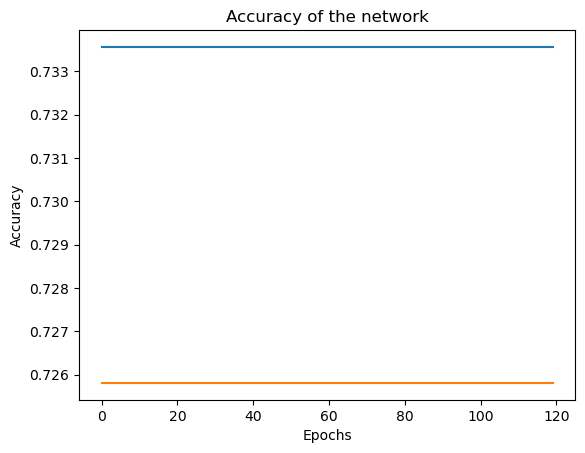

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy of the network')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Question 2

In [25]:
q2=pd.read_csv('gas_turbines.csv')

In [26]:
q2.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [27]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [28]:
q2.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [33]:
X =q2.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= q2.loc[:,['TEY']]

In [34]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484


In [40]:
y.head()

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72


In [36]:
x_arr=x.to_numpy()
type(x_arr)

numpy.ndarray

In [37]:
y_arr=y.to_numpy()

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [43]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [47]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.13 (0.07) MSE


In [45]:
estimator.fit(X, y)
prediction = estimator.predict(X)
prediction

array([-1.4651022, -1.4731102, -1.4580784, ..., -1.8092985, -1.7554398,
       -1.6789315], dtype=float32)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [49]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [50]:
prediction

array([-0.10551836,  0.33501053, -0.28621814, ..., -0.21623103,
        0.34171546,  0.20159748], dtype=float32)

In [51]:
X = q2.drop(columns = ['TEY'], axis = 1) 
y = q2.iloc[:,7]

In [52]:
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [53]:
import tensorflow as tf
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [54]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [55]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 2s - loss: 2762.4099 - mean_squared_error: 2762.4099 - val_loss: 165.9154 - val_mean_squared_error: 165.9154 - 2s/epoch - 5ms/step
Epoch 2/100
381/381 - 1s - loss: 90.7718 - mean_squared_error: 90.7718 - val_loss: 65.1722 - val_mean_squared_error: 65.1722 - 1s/epoch - 3ms/step
Epoch 3/100
381/381 - 1s - loss: 39.3377 - mean_squared_error: 39.3377 - val_loss: 31.2237 - val_mean_squared_error: 31.2237 - 975ms/epoch - 3ms/step
Epoch 4/100
381/381 - 1s - loss: 20.6281 - mean_squared_error: 20.6281 - val_loss: 20.1715 - val_mean_squared_error: 20.1715 - 1s/epoch - 3ms/step
Epoch 5/100
381/381 - 1s - loss: 11.2243 - mean_squared_error: 11.2243 - val_loss: 10.0332 - val_mean_squared_error: 10.0332 - 1s/epoch - 3ms/step
Epoch 6/100
381/381 - 1s - loss: 7.0801 - mean_squared_error: 7.0801 - val_loss: 7.0476 - val_mean_squared_error: 7.0476 - 1s/epoch - 4ms/step
Epoch 7/100
381/381 - 2s - loss: 4.9777 - mean_squared_error: 4.9777 - val_loss: 4.8495 - val_mean_squared_error:

In [56]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 1.0901 - mean_squared_error: 1.0901


In [57]:
predictions = model.predict_on_batch(X_test_scaled)

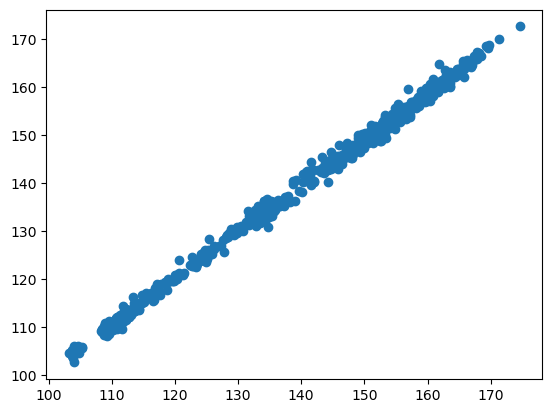

In [58]:
plt.scatter(y_test, predictions)

In [59]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,134.908142,0.333290
1,111.88,112.697731,0.730900
2,133.72,134.645950,0.692455
3,133.79,133.739365,0.037847
4,110.77,111.385040,0.555241
...,...,...,...
1499,132.85,133.819229,0.729567
1500,125.07,125.551163,0.384715
1501,160.95,160.170181,0.484510
1502,133.12,133.537247,0.313437
